In [81]:
import pandas as pd
from rdkit import Chem

def prepare_data():
    df_main = pd.read_csv(r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\init_data\pKa_Prediction_Starting data_2024.01.25.csv', index_col=0)
    # df_main = pd.read_csv(r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\init_data\pKa_Prediction_Starting data_2024.05.07.csv', index_col=0)

    SMILES_to_fgroup = {}
    SMILES_to_identificator = {}
    SMILES_to_cycle_type = {}
    SMILES_to_logP = {}
    for index, row in df_main.iterrows():
        SMILES = row['Amides for LogP']
        if pd.isnull(SMILES):
            continue
        
        SMILES_to_fgroup[SMILES] = row['F group']
        SMILES_to_identificator[SMILES] = row['identificator']
        SMILES_to_cycle_type[SMILES] = row['Framework']
        SMILES_to_logP[SMILES] = row['LogP']
    
    return SMILES_to_fgroup, SMILES_to_identificator, SMILES_to_cycle_type, SMILES_to_logP

def train_test_smiles_data(is_canon=True):
    train = pd.read_csv(r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\logP_lipophilicity_data\gnn_cv\train.csv')
    test = pd.read_csv(r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\logP_lipophilicity_data\gnn_cv\test.csv')

    train_SMILES = train['Smiles'].tolist()
    test_SMILES = test['Smiles'].tolist()

    if is_canon:
        for train_index in range(len(train_SMILES)):
            train_SMILES[train_index] = Chem.CanonSmiles(train_SMILES[train_index])
        for test_index in range(len(test_SMILES)):
            test_SMILES[test_index] = Chem.CanonSmiles(test_SMILES[test_index])
    
    smiles_to_fold = {}
    for index, row in train.iterrows():
        smiles_to_fold[row['Smiles']] = row['fold_id']
    
    return train_SMILES, test_SMILES, smiles_to_fold

In [82]:
# all test(separate model for each molecule)
relevances_fluorine_all = {'O=C(NC1=CC=CC=C1)C1CCCCC1': 0.0, 'O=C(NC1=CC=CC=C1)[C@H]1C[C@@H]2C[C@@H]2C1': 0.0, 'O=C(NC1=CC=CC=C1)[C@@H]1C[C@@H]2C[C@@H]2C1': 0.0, 'FC1(F)[C@H]2C[C@H](C[C@@H]12)C(=O)NC1=CC=CC=C1': -0.192, 'FC1(F)[C@H]2C[C@@H](C[C@@H]12)C(=O)NC1=CC=CC=C1': -0.056, 'O=C(NC1=CC=CC=C1)C1CCC1': 0.0, 'FCC1(CCC1)C(=O)NC1=CC=CC=C1': -0.252, 'FC(F)C1(CCC1)C(=O)NC1=CC=CC=C1': -0.036, 'FC(F)(F)C1(CCC1)C(=O)NC1=CC=CC=C1': 0.276, 'FC(F)(F)[C@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1': 0.585, 'FC(F)(F)[C@@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1': 0.589, '[H]C(F)(F)[C@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1': 0.016, '[H]C(F)(F)[C@@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1': -0.03, '[H]C([H])(F)[C@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1': -0.19, '[H]C([H])(F)[C@@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1': -0.302, 'FC1(F)CC(C1)C(=O)NC1=CC=CC=C1': -0.005, 'FC1(F)CCCC1C(=O)NC1=CC=CC=C1': -0.384, 'FC1(F)CCC(C1)C(=O)NC1=CC=CC=C1': -0.154, 'FC1(F)CCCCC1C(=O)NC1=CC=CC=C1': -0.388, 'FC1(F)CCCCCC1C(=O)NC1=CC=CC=C1': -0.354, 'FC1(F)CCCCC(C1)C(=O)NC1=CC=CC=C1': -0.232, 'FC1(F)CCCC(CC1)C(=O)NC1=CC=CC=C1': -0.302, 'CCC(F)(F)CC(=O)NC1=CC=CC=C1': -0.057, 'FC(F)CCCC(=O)NC1=CC=CC=C1': -0.077, 'O=C(NC1=CC=CC=C1)C1CC1': 0.0, 'O=C(NC1=CC=CC=C1)C1CCCC1': 0.0, 'O=C(NC1=CC=CC=C1)C1CCCCCC1': 0.0, 'CCCCC(=O)NC1=CC=CC=C1': 0.0, 'FC(F)(F)C12CC(C1)(OC2)C(=O)NC1=CC=CC=C1': 0.585, 'O=C(NC1=CC=CC=C1)C12CC(C1)CO2': 0.0, 'O=C(NC1=CC=CC=C1)C1=CC=CC=C1': 0.0, 'FC(F)(F)[C@@H]1CC[C@H]1C(=O)NC1=CC=CC=C1': 0.503, '[H]C(F)(F)[C@@H]1CC[C@H]1C(=O)NC1=CC=CC=C1': -0.075, '[H]C([H])(F)[C@@H]1CC[C@H]1C(=O)NC1=CC=CC=C1': -0.176, 'FC(F)(F)[C@@H]1C[C@H]1C(=O)NC1=CC=CC=C1': 0.698, 'FC(F)(F)[C@@H]1C[C@@H]1C(=O)NC1=CC=CC=C1': 0.605, '[H]C(F)(F)[C@@H]1C[C@H]1C(=O)NC1=CC=CC=C1': 0.198, '[H]C(F)(F)[C@@H]1C[C@@H]1C(=O)NC1=CC=CC=C1': 0.35, '[H]C([H])(F)[C@@H]1C[C@H]1C(=O)NC1=CC=CC=C1': 0.146, 'O=C(NC1=CC=CC=C1)C1CC11CC1': 0.0, 'FC1(F)C(C(=O)NC2=CC=CC=C2)C11CC1': 0.023, 'FC1(F)CC11CC1C(=O)NC1=CC=CC=C1': 0.173, 'FC1(F)[C@H]2C[C@H](C[C@@H]12)NC(=O)C1=CC=CC=C1': 0.029, 'FC1(F)CCC(CC1)NC(=O)C1=CC=CC=C1': -0.375, 'O=C(NC1CCCCC1)C1=CC=CC=C1': 0.0, 'O=C(N[C@@H]1C[C@@H]2C[C@@H]2C1)C1=CC=CC=C1': 0.0, 'O=C(N[C@H]1C[C@@H]2C[C@@H]2C1)C1=CC=CC=C1': 0.0, 'FC(F)(F)C12CC(C1)CN2C(=O)C1=CC=CC=C1': 0.463, 'FC(F)(F)C1CCCN1C(=O)C1=CC=CC=C1': 0.908, 'O=C(N1CC2CC1C2)C1=CC=CC=C1': 0.0, 'O=C(N1CCCC1)C1=CC=CC=C1': 0.0, 'CC12CC(C1)CN2C(=O)C1=CC=CC=C1': -0.0, 'FC(F)(F)C12CCC(CN1C(=O)C1=CC=CC=C1)C2': 0.636, 'FC(F)(F)C12CCC(CC1)CN2C(=O)C1=CC=CC=C1': 0.498, 'FC(F)(F)C1CCCCN1C(=O)C1=CC=CC=C1': 0.725, 'O=C(N1CC2CCC1C2)C1=CC=CC=C1': -0.0, 'CC12CCC(CC1)CN2C(=O)C1=CC=CC=C1': 0.0, 'O=C(N1CC2CCC1CC2)C1=CC=CC=C1': 0.0, 'O=C(N1CCCCC1)C1=CC=CC=C1': -0.0, 'FC(F)(F)C12CC(CN1C(=O)C1=CC=CC=C1)CCC2': 0.496, 'O=C(N1CC2CC1CCC2)C1=CC=CC=C1': -0.0, 'CC12CC(CN1C(=O)C1=CC=CC=C1)CCC2': 0.0, 'FC1(F)CC2CC(CN(C2)C(=O)C2=CC=CC=C2)C1': -0.4, 'FC1(F)CC2CN(CC(C1)C2(F)F)C(=O)C1=CC=CC=C1': -0.501, 'FC1(F)C2CCCC1CN(C2)C(=O)C1=CC=CC=C1': -0.019, 'FC1(F)C2COCC1CN(C2)C(=O)C1=CC=CC=C1': 0.353, 'O=C(N1CC2COCC(C2)C1)C1=CC=CC=C1': 0.0, 'FC1(F)C2CCC1CN(C2)C(=O)C1=CC=CC=C1': -0.049, 'O=C(N1CC2CCC(C2)C1)C1=CC=CC=C1': -0.0, 'O=C(N1CCC1)C1=CC=CC=C1': 0.0, 'FC1CN(C1)C(=O)C1=CC=CC=C1': -0.125, 'FC1CCN(C1)C(=O)C1=CC=CC=C1': -0.284, 'FC1(F)CCN(C1)C(=O)C1=CC=CC=C1': 0.18, 'F[C@H]1CN(C[C@H]1F)C(=O)C1=CC=CC=C1': -0.145, 'F[C@@H]1CN(C[C@H]1F)C(=O)C1=CC=CC=C1': -0.121, 'FC1CCCN(C1)C(=O)C1=CC=CC=C1': -0.354, 'FC1(F)CCCN(C1)C(=O)C1=CC=CC=C1': -0.0, 'F[C@H]1C[C@@H](F)CN(C1)C(=O)C1=CC=CC=C1': -0.429, 'F[C@H]1C[C@H](F)CN(C1)C(=O)C1=CC=CC=C1': -0.429, 'F[C@@H]1CCN(C[C@@H]1F)C(=O)C1=CC=CC=C1': -0.423, 'F[C@@H]1CCN(C[C@H]1F)C(=O)C1=CC=CC=C1': -0.262, 'FC(F)(F)C1(CCC1)NC(=O)C1=CC=CC=C1': 0.55, 'FCC1(CCC1)NC(=O)C1=CC=CC=C1': 0.083, 'FC(F)(F)[C@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1': 0.77, 'FC(F)(F)[C@@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1': 0.679, '[H]C(F)(F)[C@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1': 0.021, '[H]C(F)(F)[C@@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1': 0.035, '[H]C([H])(F)[C@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1': -0.211, '[H]C([H])(F)[C@@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1': -0.186, '[H]C(F)(F)C1CCCCN1C(=O)C1=CC=CC=C1': 0.427, '[H]C([H])(F)C1CCCCN1C(=O)C1=CC=CC=C1': 0.321, '[H]C(F)(F)C1CCCN1C(=O)C1=CC=CC=C1': 0.564, '[H]C([H])(F)C1CCCN1C(=O)C1=CC=CC=C1': 0.33, 'FC(F)(F)C1CCN1C(=O)C1=CC=CC=C1': 0.73, '[H]C(F)(F)C1CCN1C(=O)C1=CC=CC=C1': 0.398, '[H]C([H])(F)C1CCN1C(=O)C1=CC=CC=C1': 0.287, '[H]C(F)(F)CNC(=O)C1=CC=CC=C1': 0.167, 'FC(F)(F)C1CCCN(C1)C(=O)C1=CC=CC=C1': 0.702, '[H]C(F)(F)C1CCCN(C1)C(=O)C1=CC=CC=C1': 0.152, '[H]C([H])(F)C1CCCN(C1)C(=O)C1=CC=CC=C1': -0.112, 'FC(F)(F)C1CCN(C1)C(=O)C1=CC=CC=C1': 0.586, '[H]C(F)(F)C1CCN(C1)C(=O)C1=CC=CC=C1': 0.209, 'FC(F)(F)C1CN(C1)C(=O)C1=CC=CC=C1': 0.576, '[H]C(F)(F)C1CN(C1)C(=O)C1=CC=CC=C1': 0.252, '[H]C([H])(F)C1CN(C1)C(=O)C1=CC=CC=C1': -0.04, '[H]C(F)(F)CCNC(=O)C1=CC=CC=C1': 0.188, '[H]C([H])(F)CCNC(=O)C1=CC=CC=C1': -0.03, 'CCNC(=O)C1=CC=CC=C1': 0.0, 'FC(F)(F)C1CCN(CC1)C(=O)C1=CC=CC=C1': 0.433, '[H]C([H])(F)C1CCN(CC1)C(=O)C1=CC=CC=C1': -0.232, '[H]C([H])(F)CCCNC(=O)C1=CC=CC=C1': -0.177, '[H]C(F)(F)CCCNC(=O)C1=CC=CC=C1': 0.018, 'FC(F)(F)CCCNC(=O)C1=CC=CC=C1': 0.486, 'CCCNC(=O)C1=CC=CC=C1': 0.0, 'FC1(F)CC(C1)NC(=O)C1=CC=CC=C1': -0.019, 'FC1(F)CCCC1NC(=O)C1=CC=CC=C1': -0.327, 'FC1(F)CCCCC1NC(=O)C1=CC=CC=C1': -0.41, 'FC1(F)CCCC(C1)NC(=O)C1=CC=CC=C1': -0.459, 'FC1(F)CCCCCC1NC(=O)C1=CC=CC=C1': -0.333, 'FC1(F)CCCCC(C1)NC(=O)C1=CC=CC=C1': -0.278, 'FC1(F)CCCC(CC1)NC(=O)C1=CC=CC=C1': -0.51, 'CCC(F)(F)CNC(=O)C1=CC=CC=C1': -0.192, 'CC(F)(F)CCNC(=O)C1=CC=CC=C1': -0.169, 'FC(F)CCCNC(=O)C1=CC=CC=C1': 0.038, 'O=C(NC1CC1)C1=CC=CC=C1': 0.0, 'O=C(NC1CCCC1)C1=CC=CC=C1': 0.0, 'O=C(NC1CCCCCC1)C1=CC=CC=C1': 0.0, 'CCCCNC(=O)C1=CC=CC=C1': 0.0, 'O=C(NC1CC2(CCC2)C1)C1=CC=CC=C1': 0.0, 'FC1(F)CC2(CC(C2)NC(=O)C2=CC=CC=C2)C1': -0.303, 'FC(F)(F)[C@@H]1CC[C@H]1NC(=O)C1=CC=CC=C1': 0.596, 'FC(F)(F)[C@@H]1C[C@H]1NC(=O)C1=CC=CC=C1': 0.437, 'FC(F)(F)[C@@H]1C[C@@H]1NC(=O)C1=CC=CC=C1': 0.597, '[H]C(F)(F)[C@@H]1C[C@H]1NC(=O)C1=CC=CC=C1': 0.05, '[H]C(F)(F)[C@@H]1C[C@@H]1NC(=O)C1=CC=CC=C1': 0.438, 'C[C@@H]1C[C@H]1NC(=O)C1=CC=CC=C1': 0.0, 'C[C@@H]1C[C@@H]1NC(=O)C1=CC=CC=C1': 0.0, 'O=C(NC1CC11CC1)C1=CC=CC=C1': 0.0, 'FC1(F)CC11CC1NC(=O)C1=CC=CC=C1': -0.037, 'O=C(NC1CCC1)C1=CC=CC=C1': 0.0, 'FC1(F)CC1C(=O)NC1=CC=CC=C1': 0.121, 'FC1(F)CC2(CC(C2)C(=O)NC2=CC=CC=C2)C1': -0.379, 'FC1CCN(CC1)C(=O)C1=CC=CC=C1': -0.157, 'FC1(F)CCC(CC1)C(=O)NC1=CC=CC=C1': -0.277, '[H]C(F)(F)[C@@H]1CC[C@H]1NC(=O)C1=CC=CC=C1': -0.002, 'O=C(NC1=CC=CC=C1)C1CC2(CCC2)C1': 0.0, 'O=C(N1CC2CCCC(C2)C1)C1=CC=CC=C1': 0.0, 'FC1(F)CCN(CC1)C(=O)C1=CC=CC=C1': -0.218, '[H]C(F)(F)C1CCN(CC1)C(=O)C1=CC=CC=C1': 0.096, 'C[C@@H]1C[C@@H]1C(=O)NC1=CC=CC=C1': 0.0, 'FC(F)(F)CCNC(=O)C1=CC=CC=C1': 0.633, '[H]C(F)(F)C12CC(C1)(OC2)C(=O)NC1=CC=CC=C1': 0.387, 'FC1(F)CCC1NC(=O)C1=CC=CC=C1': -0.271, '[H]C([H])(F)C1CCN(C1)C(=O)C1=CC=CC=C1': 0.056, 'FC1(F)CN(C1)C(=O)C1=CC=CC=C1': 0.204, 'FC1(F)CCC(C1)NC(=O)C1=CC=CC=C1': -0.204, '[H]C([H])(F)[C@@H]1CC[C@H]1NC(=O)C1=CC=CC=C1': -0.163, 'FC1(F)CCC1C(=O)NC1=CC=CC=C1': -0.237, 'FC1(F)[C@H]2C[C@@H](C[C@@H]12)NC(=O)C1=CC=CC=C1': 0.018, '[H]C([H])(F)CNC(=O)C1=CC=CC=C1': -0.017, 'FC(F)C1(CCC1)NC(=O)C1=CC=CC=C1': 0.358, 'C[C@@H]1C[C@H]1C(=O)NC1=CC=CC=C1': 0.0, 'FC1(F)CCCC(C1)C(=O)NC1=CC=CC=C1': -0.167, 'CC(F)(F)CCC(=O)NC1=CC=CC=C1': -0.172}
# 3 models for all models to be in OOS
# relevances_fluorine_all = {'O=C(NC1=CC=CC=C1)C1CCCCC1': 0.0, 'O=C(NC1=CC=CC=C1)[C@H]1C[C@@H]2C[C@@H]2C1': 0.0, 'O=C(NC1=CC=CC=C1)[C@@H]1C[C@@H]2C[C@@H]2C1': 0.0, 'FC1(F)[C@H]2C[C@H](C[C@@H]12)C(=O)NC1=CC=CC=C1': -0.053, 'FC1(F)[C@H]2C[C@@H](C[C@@H]12)C(=O)NC1=CC=CC=C1': 0.004, 'O=C(NC1=CC=CC=C1)C1CCC1': 0.0, 'FCC1(CCC1)C(=O)NC1=CC=CC=C1': -0.096, 'FC(F)C1(CCC1)C(=O)NC1=CC=CC=C1': 0.108, 'FC(F)(F)C1(CCC1)C(=O)NC1=CC=CC=C1': 0.308, 'FC(F)(F)[C@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1': 0.532, 'FC(F)(F)[C@@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1': 0.532, '[H]C(F)(F)[C@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1': 0.351, '[H]C(F)(F)[C@@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1': 0.351, '[H]C([H])(F)[C@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1': -0.052, '[H]C([H])(F)[C@@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1': -0.052, 'FC1(F)CC(C1)C(=O)NC1=CC=CC=C1': -0.049, 'FC1(F)CCCC1C(=O)NC1=CC=CC=C1': -0.085, 'FC1(F)CCC(C1)C(=O)NC1=CC=CC=C1': -0.221, 'FC1(F)CCCCC1C(=O)NC1=CC=CC=C1': -0.085, 'FC1(F)CCCCCC1C(=O)NC1=CC=CC=C1': -0.122, 'FC1(F)CCCCC(C1)C(=O)NC1=CC=CC=C1': -0.234, 'FC1(F)CCCC(CC1)C(=O)NC1=CC=CC=C1': 0.032, 'CCC(F)(F)CC(=O)NC1=CC=CC=C1': 0.058, 'FC(F)CCCC(=O)NC1=CC=CC=C1': 0.162, 'O=C(NC1=CC=CC=C1)C1CC1': 0.0, 'O=C(NC1=CC=CC=C1)C1CCCC1': 0.0, 'O=C(NC1=CC=CC=C1)C1CCCCCC1': 0.0, 'CCCCC(=O)NC1=CC=CC=C1': 0.0, 'FC(F)(F)C12CC(C1)(OC2)C(=O)NC1=CC=CC=C1': 0.589, 'O=C(NC1=CC=CC=C1)C12CC(C1)CO2': 0.0, 'O=C(NC1=CC=CC=C1)C1=CC=CC=C1': 0.0, 'FC(F)(F)[C@@H]1CC[C@H]1C(=O)NC1=CC=CC=C1': 0.583, '[H]C(F)(F)[C@@H]1CC[C@H]1C(=O)NC1=CC=CC=C1': 0.16, '[H]C([H])(F)[C@@H]1CC[C@H]1C(=O)NC1=CC=CC=C1': 0.013, 'FC(F)(F)[C@@H]1C[C@H]1C(=O)NC1=CC=CC=C1': 0.856, 'FC(F)(F)[C@@H]1C[C@@H]1C(=O)NC1=CC=CC=C1': 1.021, '[H]C(F)(F)[C@@H]1C[C@H]1C(=O)NC1=CC=CC=C1': 0.261, '[H]C(F)(F)[C@@H]1C[C@@H]1C(=O)NC1=CC=CC=C1': 0.31, '[H]C([H])(F)[C@@H]1C[C@H]1C(=O)NC1=CC=CC=C1': 0.219, 'O=C(NC1=CC=CC=C1)C1CC11CC1': 0.0, 'FC1(F)C(C(=O)NC2=CC=CC=C2)C11CC1': -0.014, 'FC1(F)CC11CC1C(=O)NC1=CC=CC=C1': 0.038, 'FC1(F)[C@H]2C[C@H](C[C@@H]12)NC(=O)C1=CC=CC=C1': 0.232, 'FC1(F)CCC(CC1)NC(=O)C1=CC=CC=C1': -0.12, 'O=C(NC1CCCCC1)C1=CC=CC=C1': 0.0, 'O=C(N[C@@H]1C[C@@H]2C[C@@H]2C1)C1=CC=CC=C1': 0.0, 'O=C(N[C@H]1C[C@@H]2C[C@@H]2C1)C1=CC=CC=C1': 0.0, 'FC(F)(F)C12CC(C1)CN2C(=O)C1=CC=CC=C1': 0.768, 'FC(F)(F)C1CCCN1C(=O)C1=CC=CC=C1': 1.11, 'O=C(N1CC2CC1C2)C1=CC=CC=C1': 0.0, 'O=C(N1CCCC1)C1=CC=CC=C1': 0.0, 'CC12CC(C1)CN2C(=O)C1=CC=CC=C1': 0.0, 'FC(F)(F)C12CCC(CN1C(=O)C1=CC=CC=C1)C2': 0.417, 'FC(F)(F)C12CCC(CC1)CN2C(=O)C1=CC=CC=C1': 0.186, 'FC(F)(F)C1CCCCN1C(=O)C1=CC=CC=C1': 1.04, 'O=C(N1CC2CCC1C2)C1=CC=CC=C1': 0.0, 'CC12CCC(CC1)CN2C(=O)C1=CC=CC=C1': 0.0, 'O=C(N1CC2CCC1CC2)C1=CC=CC=C1': 0.0, 'O=C(N1CCCCC1)C1=CC=CC=C1': 0.0, 'FC(F)(F)C12CC(CN1C(=O)C1=CC=CC=C1)CCC2': 0.392, 'O=C(N1CC2CC1CCC2)C1=CC=CC=C1': 0.0, 'CC12CC(CN1C(=O)C1=CC=CC=C1)CCC2': 0.0, 'FC1(F)CC2CC(CN(C2)C(=O)C2=CC=CC=C2)C1': -0.125, 'FC1(F)CC2CN(CC(C1)C2(F)F)C(=O)C1=CC=CC=C1': -0.495, 'FC1(F)C2CCCC1CN(C2)C(=O)C1=CC=CC=C1': 0.306, 'FC1(F)C2COCC1CN(C2)C(=O)C1=CC=CC=C1': 0.368, 'O=C(N1CC2COCC(C2)C1)C1=CC=CC=C1': 0.0, 'FC1(F)C2CCC1CN(C2)C(=O)C1=CC=CC=C1': 0.339, 'O=C(N1CC2CCC(C2)C1)C1=CC=CC=C1': 0.0, 'O=C(N1CCC1)C1=CC=CC=C1': 0.0, 'FC1CN(C1)C(=O)C1=CC=CC=C1': 0.092, 'FC1CCN(C1)C(=O)C1=CC=CC=C1': -0.122, 'FC1(F)CCN(C1)C(=O)C1=CC=CC=C1': -0.049, 'F[C@H]1CN(C[C@H]1F)C(=O)C1=CC=CC=C1': -0.338, 'F[C@@H]1CN(C[C@H]1F)C(=O)C1=CC=CC=C1': -0.254, 'FC1CCCN(C1)C(=O)C1=CC=CC=C1': -0.272, 'FC1(F)CCCN(C1)C(=O)C1=CC=CC=C1': -0.071, 'F[C@H]1C[C@@H](F)CN(C1)C(=O)C1=CC=CC=C1': -0.459, 'F[C@H]1C[C@H](F)CN(C1)C(=O)C1=CC=CC=C1': -0.385, 'F[C@@H]1CCN(C[C@@H]1F)C(=O)C1=CC=CC=C1': -0.304, 'F[C@@H]1CCN(C[C@H]1F)C(=O)C1=CC=CC=C1': -0.14, 'FC(F)(F)C1(CCC1)NC(=O)C1=CC=CC=C1': 0.75, 'FCC1(CCC1)NC(=O)C1=CC=CC=C1': 0.248, 'FC(F)(F)[C@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1': 0.597, 'FC(F)(F)[C@@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1': 0.597, '[H]C(F)(F)[C@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1': 0.293, '[H]C(F)(F)[C@@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1': 0.293, '[H]C([H])(F)[C@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1': -0.078, '[H]C([H])(F)[C@@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1': -0.198, '[H]C(F)(F)C1CCCCN1C(=O)C1=CC=CC=C1': 0.157, '[H]C([H])(F)C1CCCCN1C(=O)C1=CC=CC=C1': 0.159, '[H]C(F)(F)C1CCCN1C(=O)C1=CC=CC=C1': 0.153, '[H]C([H])(F)C1CCCN1C(=O)C1=CC=CC=C1': 0.173, 'FC(F)(F)C1CCN1C(=O)C1=CC=CC=C1': 1.015, '[H]C(F)(F)C1CCN1C(=O)C1=CC=CC=C1': 0.075, '[H]C([H])(F)C1CCN1C(=O)C1=CC=CC=C1': 0.109, '[H]C(F)(F)CNC(=O)C1=CC=CC=C1': 0.31, 'FC(F)(F)C1CCCN(C1)C(=O)C1=CC=CC=C1': 0.742, '[H]C(F)(F)C1CCCN(C1)C(=O)C1=CC=CC=C1': 0.24, '[H]C([H])(F)C1CCCN(C1)C(=O)C1=CC=CC=C1': -0.062, 'FC(F)(F)C1CCN(C1)C(=O)C1=CC=CC=C1': 0.819, '[H]C(F)(F)C1CCN(C1)C(=O)C1=CC=CC=C1': -0.115, 'FC(F)(F)C1CN(C1)C(=O)C1=CC=CC=C1': 0.754, '[H]C(F)(F)C1CN(C1)C(=O)C1=CC=CC=C1': 0.061, '[H]C([H])(F)C1CN(C1)C(=O)C1=CC=CC=C1': -0.15, '[H]C(F)(F)CCNC(=O)C1=CC=CC=C1': 0.115, '[H]C([H])(F)CCNC(=O)C1=CC=CC=C1': 0.095, 'CCNC(=O)C1=CC=CC=C1': 0.0, 'FC(F)(F)C1CCN(CC1)C(=O)C1=CC=CC=C1': 0.752, '[H]C([H])(F)C1CCN(CC1)C(=O)C1=CC=CC=C1': -0.111, '[H]C([H])(F)CCCNC(=O)C1=CC=CC=C1': -0.023, '[H]C(F)(F)CCCNC(=O)C1=CC=CC=C1': 0.113, 'FC(F)(F)CCCNC(=O)C1=CC=CC=C1': 0.539, 'CCCNC(=O)C1=CC=CC=C1': 0.0, 'FC1(F)CC(C1)NC(=O)C1=CC=CC=C1': -0.007, 'FC1(F)CCCC1NC(=O)C1=CC=CC=C1': 0.014, 'FC1(F)CCCCC1NC(=O)C1=CC=CC=C1': 0.014, 'FC1(F)CCCC(C1)NC(=O)C1=CC=CC=C1': -0.32, 'FC1(F)CCCCCC1NC(=O)C1=CC=CC=C1': 0.044, 'FC1(F)CCCCC(C1)NC(=O)C1=CC=CC=C1': -0.162, 'FC1(F)CCCC(CC1)NC(=O)C1=CC=CC=C1': -0.057, 'CCC(F)(F)CNC(=O)C1=CC=CC=C1': 0.048, 'CC(F)(F)CCNC(=O)C1=CC=CC=C1': 0.204, 'FC(F)CCCNC(=O)C1=CC=CC=C1': 0.113, 'O=C(NC1CC1)C1=CC=CC=C1': 0.0, 'O=C(NC1CCCC1)C1=CC=CC=C1': 0.0, 'O=C(NC1CCCCCC1)C1=CC=CC=C1': 0.0, 'CCCCNC(=O)C1=CC=CC=C1': 0.0, 'O=C(NC1CC2(CCC2)C1)C1=CC=CC=C1': 0.0, 'FC1(F)CC2(CC(C2)NC(=O)C2=CC=CC=C2)C1': -0.303, 'FC(F)(F)[C@@H]1CC[C@H]1NC(=O)C1=CC=CC=C1': 0.543, 'FC(F)(F)[C@@H]1C[C@H]1NC(=O)C1=CC=CC=C1': 0.817, 'FC(F)(F)[C@@H]1C[C@@H]1NC(=O)C1=CC=CC=C1': 0.395, '[H]C(F)(F)[C@@H]1C[C@H]1NC(=O)C1=CC=CC=C1': 0.207, '[H]C(F)(F)[C@@H]1C[C@@H]1NC(=O)C1=CC=CC=C1': 0.04, 'C[C@@H]1C[C@H]1NC(=O)C1=CC=CC=C1': 0.0, 'C[C@@H]1C[C@@H]1NC(=O)C1=CC=CC=C1': 0.0, 'O=C(NC1CC11CC1)C1=CC=CC=C1': 0.0, 'FC1(F)CC11CC1NC(=O)C1=CC=CC=C1': 0.16, 'O=C(NC1CCC1)C1=CC=CC=C1': 0.0, 'FC1(F)CC1C(=O)NC1=CC=CC=C1': 0.212, 'FC1(F)CC2(CC(C2)C(=O)NC2=CC=CC=C2)C1': -0.434, 'FC1CCN(CC1)C(=O)C1=CC=CC=C1': -0.016, 'FC1(F)CCC(CC1)C(=O)NC1=CC=CC=C1': -0.303, '[H]C(F)(F)[C@@H]1CC[C@H]1NC(=O)C1=CC=CC=C1': 0.031, 'O=C(NC1=CC=CC=C1)C1CC2(CCC2)C1': 0.0, 'O=C(N1CC2CCCC(C2)C1)C1=CC=CC=C1': 0.0, 'FC1(F)CCN(CC1)C(=O)C1=CC=CC=C1': -0.183, '[H]C(F)(F)C1CCN(CC1)C(=O)C1=CC=CC=C1': 0.216, 'C[C@@H]1C[C@@H]1C(=O)NC1=CC=CC=C1': 0.0, 'FC(F)(F)CCNC(=O)C1=CC=CC=C1': 0.746, '[H]C(F)(F)C12CC(C1)(OC2)C(=O)NC1=CC=CC=C1': 0.362, 'FC1(F)CCC1NC(=O)C1=CC=CC=C1': -0.296, '[H]C([H])(F)C1CCN(C1)C(=O)C1=CC=CC=C1': -0.055, 'FC1(F)CN(C1)C(=O)C1=CC=CC=C1': 0.217, 'FC1(F)CCC(C1)NC(=O)C1=CC=CC=C1': -0.367, '[H]C([H])(F)[C@@H]1CC[C@H]1NC(=O)C1=CC=CC=C1': -0.236, 'FC1(F)CCC1C(=O)NC1=CC=CC=C1': -0.191, 'FC1(F)[C@H]2C[C@@H](C[C@@H]12)NC(=O)C1=CC=CC=C1': 0.053, '[H]C([H])(F)CNC(=O)C1=CC=CC=C1': -0.2, 'FC(F)C1(CCC1)NC(=O)C1=CC=CC=C1': 0.387, 'C[C@@H]1C[C@H]1C(=O)NC1=CC=CC=C1': 0.0, 'FC1(F)CCCC(C1)C(=O)NC1=CC=CC=C1': -0.328, 'CC(F)(F)CCC(=O)NC1=CC=CC=C1': -0.286}

relevances_fluorine_all_temp = {}
for smiles, relevance in relevances_fluorine_all.items():
    relevances_fluorine_all_temp[smiles] = round(relevance, 2)
relevances_fluorine_all = relevances_fluorine_all_temp.copy()

SMILES_to_fgroup, SMILES_to_identificator, SMILES_to_cycle_type, SMILES_to_logP = prepare_data()
train_smiles, test_smiles, smiles_to_fold = train_test_smiles_data()

In [83]:

SMILES_to_fgroup, SMILES_to_identificator, SMILES_to_cycle_type, SMILES_to_pKa = prepare_data()
train_smiles, test_smiles, smiles_to_fold = train_test_smiles_data()

relevances_fluorine = {}
for SMILES, relevance in relevances_fluorine_all.items():
    if "acid" in SMILES_to_identificator[SMILES].lower():
        relevances_fluorine[SMILES] = relevance

In [84]:
from rdkit import Chem
import re

def convert_google_sheet_url(url):
    pattern = r'https://docs\.google\.com/spreadsheets/d/([a-zA-Z0-9-_]+)(/edit#gid=(\d+)|/edit.*)?'

    replacement = lambda m: f'https://docs.google.com/spreadsheets/d/{m.group(1)}/export?' + (f'gid={m.group(3)}&' if m.group(3) else '') + 'format=csv'

    new_url = re.sub(pattern, replacement, url)

    return new_url

import pandas as pd

url = 'https://docs.google.com/spreadsheets/d/1CzpQGGeGzVZ0sv-pUm6jfaQ2dB6vecDpXeotMhIpUnQ/edit#gid=0'

new_url = convert_google_sheet_url(url)

print(new_url)

df = pd.read_csv(new_url)

df.dropna(subset=['F Group'], inplace=True)

smiles_to_id = {}
for index, row in df.iterrows():
    if not pd.isnull(row['Unnamed: 10']) or not pd.isnull(row['F Group Weight.1']):
        continue
    smiles_to_id[row['Amide SMILES']] = row['Amide ID']

https://docs.google.com/spreadsheets/d/1CzpQGGeGzVZ0sv-pUm6jfaQ2dB6vecDpXeotMhIpUnQ/export?gid=0&format=csv


In [85]:
acid_ids = [
    'cis-γ-6{4,b}',
    'trans-γ-6{4,b}',
    'cis-β-6{3,b}',
    'trans-β-6{3,b}',
]

colors = {
    'cis-β-6{3,b}': "limegreen", #
    'trans-β-6{3,b}': "forestgreen", #
    'cis-γ-6{4,b}': "darkorange",
    'trans-γ-6{4,b}': "burlywood",
}

line_color = {1: "blue", 2: "green", 3: "orange"}

In [86]:
import re

pattern_molecule_type = r"(\d+)\{"
pattern_scaffold_index = r"\{(\d+),\d+\}"

smiles_to_id_cis_trans = {}
for smiles, id in smiles_to_id.items():
    if "cis" in id or "trans" in id:
        molecule_type = int(re.search(pattern_molecule_type, id).group(1))
        scaffold_index = int(re.search(pattern_scaffold_index, id).group(1))
        if molecule_type == 6 and scaffold_index < 8:
            smiles_to_id_cis_trans[smiles] = id
smiles_to_id = smiles_to_id_cis_trans.copy()

In [87]:
import re

amine_type_smiles = {acid_id: [] for acid_id in acid_ids}

pattern_fluorine_group = r"\{\d+,(\d+)\}"
pattern_scaffold_index = r"\{(\d+),\d+\}"
pattern_molecule_type = r"(\d+)\{"

number_of_molecules = 0

for smiles, id in smiles_to_id.items():
    fluorine_group = int(re.search(pattern_fluorine_group, id).group(1))
    scaffold_index = int(re.search(pattern_scaffold_index, id).group(1))
    molecule_type = int(re.search(pattern_molecule_type, id).group(1))

    if fluorine_group not in [3, 4, 5]:
        continue

    if scaffold_index not in [3, 4]:
        continue

    if molecule_type not in [6]:
        continue

    if 'α' not in id and 'β' not in id and 'γ' not in id:
        continue

    transformed_id = id[:-2] + 'b}'
    
    if transformed_id in amine_type_smiles:
        amine_type_smiles[transformed_id].append(smiles)
    print(smiles, id, transformed_id, fluorine_group, scaffold_index, molecule_type)
    number_of_molecules += 1

print(f"Number of molecule: {number_of_molecules}")

[H]C([H])(F)[C@H]1C[C@H]1C(=O)NC1=CC=CC=C1 cis-β-6{3,3} cis-β-6{3,b} 3 3 6
[H]C([H])(F)[C@@H]1C[C@H]1C(=O)NC1=CC=CC=C1 trans-β-6{3,3} trans-β-6{3,b} 3 3 6
[H]C([H])(F)[C@@H]1CC[C@H]1C(=O)NC1=CC=CC=C1 trans-β-6{4,3} trans-β-6{4,b} 3 4 6
[H]C([H])(F)[C@@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1 cis-γ-6{4,3} cis-γ-6{4,b} 3 4 6
[H]C([H])(F)[C@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1 trans-γ-6{4,3} trans-γ-6{4,b} 3 4 6
[H]C(F)(F)[C@@H]1C[C@@H]1C(=O)NC1=CC=CC=C1 cis-β-6{3,4} cis-β-6{3,b} 4 3 6
[H]C(F)(F)[C@@H]1C[C@H]1C(=O)NC1=CC=CC=C1 trans-β-6{3,4} trans-β-6{3,b} 4 3 6
[H]C(F)(F)[C@@H]1CC[C@H]1C(=O)NC1=CC=CC=C1 trans-β-6{4,4} trans-β-6{4,b} 4 4 6
[H]C(F)(F)[C@@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1 cis-γ-6{4,4} cis-γ-6{4,b} 4 4 6
[H]C(F)(F)[C@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1 trans-γ-6{4,4} trans-γ-6{4,b} 4 4 6
FC(F)(F)[C@@H]1C[C@@H]1C(=O)NC1=CC=CC=C1 cis-β-6{3,5} cis-β-6{3,b} 5 3 6
FC(F)(F)[C@@H]1C[C@H]1C(=O)NC1=CC=CC=C1 trans-β-6{3,5} trans-β-6{3,b} 5 3 6
FC(F)(F)[C@@H]1CC[C@H]1C(=O)NC1=CC=CC=C1 cis-β-6{4,5} cis-β-6

In [88]:
amine_type_smiles

{'cis-γ-6{4,b}': ['[H]C([H])(F)[C@@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1',
  '[H]C(F)(F)[C@@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1',
  'FC(F)(F)[C@@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1'],
 'trans-γ-6{4,b}': ['[H]C([H])(F)[C@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1',
  '[H]C(F)(F)[C@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1',
  'FC(F)(F)[C@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1'],
 'cis-β-6{3,b}': ['[H]C([H])(F)[C@H]1C[C@H]1C(=O)NC1=CC=CC=C1',
  '[H]C(F)(F)[C@@H]1C[C@@H]1C(=O)NC1=CC=CC=C1',
  'FC(F)(F)[C@@H]1C[C@@H]1C(=O)NC1=CC=CC=C1'],
 'trans-β-6{3,b}': ['[H]C([H])(F)[C@@H]1C[C@H]1C(=O)NC1=CC=CC=C1',
  '[H]C(F)(F)[C@@H]1C[C@H]1C(=O)NC1=CC=CC=C1',
  'FC(F)(F)[C@@H]1C[C@H]1C(=O)NC1=CC=CC=C1']}

cis-γ-6{4,b} {'CH2F': 1.96, 'CHF2': 2.23, 'CF3': 2.72} {'CH2F': -0.3, 'CHF2': -0.03, 'CF3': 0.59}
trans-γ-6{4,b} {'CH2F': 2.14, 'CHF2': 2.39, 'CF3': 3.02} {'CH2F': -0.19, 'CHF2': 0.02, 'CF3': 0.58}
cis-β-6{3,b} {'CHF2': 2.35, 'CF3': 2.12} {'CHF2': 0.35, 'CF3': 0.6}
trans-β-6{3,b} {'CHF2': 2.28, 'CF3': 2.98} {'CHF2': 0.2, 'CF3': 0.7}


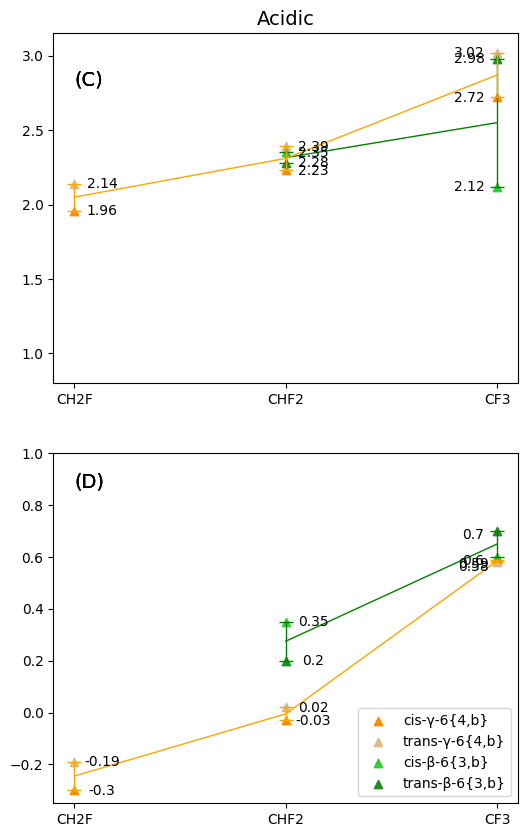

In [89]:
import matplotlib.pyplot as plt
import numpy as np

X_optimal = ['CH2F', 'CHF2', 'CF3']

Y_dict = {distance: {'CH2F': [], 'CHF2': [], 'CF3': []} for distance in range(1, 4)}
Y_pKa_dict = {distance: {'CH2F': [], 'CHF2': [], 'CF3': []} for distance in range(1, 4)}

fig, ((ax2, ax1)) = plt.subplots(2, 1, figsize=(6, 10))
for primary_amines_id, smiles_list in amine_type_smiles.items():
    if primary_amines_id == "trans-β-6{3,b}":
        X_optimal = ['CHF2', 'CF3']
    else:
        X_optimal = ['CH2F', 'CHF2', 'CF3']

    distance_global = None
    if "α" in primary_amines_id:
        distance_global = 1
    elif "β" in primary_amines_id:
        distance_global = 2
    elif "γ" in primary_amines_id:
        distance_global = 3

    f_group_to_pKa = {}
    f_group_to_relevance = {}
    for SMILES in smiles_list:
        if SMILES not in relevances_fluorine:
            continue

        f_group = SMILES_to_fgroup[SMILES]

        if f_group in X_optimal:
            f_group_to_pKa[f_group] = SMILES_to_pKa[SMILES]
            f_group_to_relevance[f_group] = relevances_fluorine[SMILES]
        
    print(primary_amines_id, f_group_to_pKa, f_group_to_relevance)

    X_local = list(f_group_to_pKa.keys())
    y_relevance = list(f_group_to_relevance.values())
    y_pKa = list(f_group_to_pKa.values())

    for f_group_optimal in X_optimal:
        if f_group_optimal not in f_group_to_relevance:
            continue

        Y_dict[distance_global][f_group_optimal].append(f_group_to_relevance[f_group_optimal])
        Y_pKa_dict[distance_global][f_group_optimal].append(f_group_to_pKa[f_group_optimal])

    ax1.scatter(X_local, y_relevance, marker='^', linestyle='-', color=colors[primary_amines_id], label=primary_amines_id)
    for i in range(len(X_local)):
        x_shift, y_shift = 20, -3
        if i + 1 == len(X_local) and X_local[i] == "CF3":
            x_shift, y_shift = -17, -6

        ax1.annotate(f"{str(y_relevance[i])}", (X_local[i], y_relevance[i]), xytext=(x_shift, y_shift), textcoords='offset points', ha='center')
    # ax1.legend()

    ax2.scatter(X_local, y_pKa, marker='^', linestyle='-', color=colors[primary_amines_id], label=primary_amines_id)
    for i in range(len(X_local)):
        # print(X_local[i], y_pKa[i])
        x_shift, y_shift = 20, -3
        if i + 1 == len(X_local) and X_local[i] == "CF3":
            x_shift, y_shift = -20, -3
        
        ax2.annotate(f"{str(y_pKa[i])}", (X_local[i], y_pKa[i]), xytext=(x_shift, y_shift), textcoords='offset points', ha='center')
    # ax2.legend()

# errorplot
for distance in range(1, 4):
    X, Y, Y_pKa = [], [], []
    for f_group_name, relevances in Y_dict[distance].items():
        if relevances != []:
            X.append(f_group_name)
            Y.append(relevances)
            Y_pKa.append(Y_pKa_dict[distance][f_group_name])

    mean_Y = [np.array(i).mean() for i in Y]
    std_deviation_Y = [np.array(i).std() for i in Y]

    ax1.plot(X, mean_Y, linestyle='-', color=line_color[distance], label="_no_legend", linewidth=1)
    ax1.set_ylim(-0.35, 1)
    for i in range(len(X)):
        ax1.errorbar(X[i], mean_Y[i], yerr=std_deviation_Y[i], color=line_color[distance], capsize=5, elinewidth=1, markeredgewidth=1)

    mean_logP_Y = [np.array(i).mean() for i in Y_pKa]
    std_deviation_logP_Y = [np.array(i).std() for i in Y_pKa]

    ax2.plot(X, mean_logP_Y, linestyle='-', color=line_color[distance], label="_no_legend", linewidth=1)
    ax2.set_ylim(0.8, 3.15)
    for i in range(len(X)):
        ax2.errorbar(X[i], mean_logP_Y[i], yerr=std_deviation_logP_Y[i], color=line_color[distance], capsize=5, elinewidth=1, markeredgewidth=1)

    ax2.text(0.0, 2.8, '(C)', fontsize = 14)
    ax1.text(0.0, 0.87, '(D)', fontsize = 14)

    ax2.set_title("Acidic", fontsize=14)
    ax1.legend(loc='lower right')

